# Advanced Models Comparisons 

In [12]:
#Libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader
from ignite.metrics import Accuracy, Loss
from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator
from scipy.stats import ks_2samp
from sklearn.preprocessing import LabelEncoder
from ignite.handlers import EarlyStopping, ModelCheckpoint
from ignite.contrib.handlers import global_step_from_engine
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV
from ignite.engine import State
from tqdm import tqdm
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

def plot_ROC_comparison(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
    plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

In [13]:
# Importing the cleaning dataset
df_imported = pd.read_csv(r"C:\Users\marco\OneDrive\Desktop\Unipi\Primo anno\Secondo semestre\Data Mining 2\final_clean_dataset.csv")

1) Data Preparation

In [14]:
data = ['duration_ms', 'popularity', 'danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers', 'explicit']

df = df_imported[data].copy()

## Mapping Genres

In [5]:
genres = df_imported['genre'].unique()
mapping_genres = {}

i= 0
# mapping genre
for element in genres:
    mapping_genres[element] = i
    i+=1

df_imported['genre'] = df_imported['genre'].map(mapping_genres)

## Split train, validation and test

In [15]:
X = df[data].values
le = LabelEncoder()
y = le.fit_transform(np.array(df_imported['genre']))

In [16]:
# Train and Validation
X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:

X_val, X_test, y_val, y_test = train_test_split(X_test_1, y_test_1, test_size=0.2
                                                    , random_state=42, stratify=y_test_1)

In [18]:
print('Train:',len(X_train))
print('Validation:',len(X_val))
print('Test:',len(X_test))

Train: 61600
Validation: 21120
Test: 5280


In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

-----------------------

## Logistic Regression

In [20]:
params = {'C': 7.320, 'max_iter': 100, 'multi_class': 'multinomial', 
          'random_state': 42, 'solver': 'newton-cg'}

# Initialize logistic regression classifier with optimal parameters
clf_r = LogisticRegression(**params)
clf_r.fit(X_train, y_train)

y_pred_train = clf_r.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_val = clf_r.predict(X_val)
print('Train accuracy:', accuracy_train)
print(classification_report(y_val, y_pred_val,zero_division=0))

Train accuracy: 0.2537824675324675
              precision    recall  f1-score   support

           0       0.15      0.13      0.14       217
           1       0.16      0.08      0.11       236
           2       0.00      0.00      0.00        62
           3       0.14      0.10      0.12       191
           4       0.29      0.36      0.32       225
           5       0.09      0.06      0.07       174
           6       0.43      0.53      0.47       233
           7       0.17      0.25      0.20       237
           8       0.00      0.00      0.00       186
           9       0.04      0.02      0.03       234
          10       0.20      0.15      0.17       235
          11       0.00      0.00      0.00       135
          12       0.15      0.27      0.19       210
          13       0.33      0.39      0.36       236
          14       0.26      0.50      0.34       238
          15       0.05      0.04      0.04       142
          16       0.54      0.38      0.44   

In [21]:
y_pred_test = clf_r.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred_test,zero_division=0))

Train accuracy: 0.2537824675324675
              precision    recall  f1-score   support

           0       0.20      0.17      0.18        54
           1       0.19      0.14      0.16        59
           2       0.00      0.00      0.00        15
           3       0.11      0.08      0.09        48
           4       0.35      0.39      0.37        56
           5       0.11      0.09      0.10        43
           6       0.39      0.50      0.44        58
           7       0.17      0.27      0.21        59
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00        58
          10       0.12      0.10      0.11        58
          11       0.00      0.00      0.00        34
          12       0.18      0.34      0.24        53
          13       0.39      0.44      0.42        59
          14       0.27      0.49      0.35        59
          15       0.00      0.00      0.00        36
          16       0.40      0.25      0.31   

In [22]:
# Variable for ROC
logreg_probs = clf_r.predict_proba(X_test)

-----------

## XGBoost 

In [23]:
XGB_clf = XGBClassifier(
    objective='multi:softmax', 
    num_class=113,
    max_depth=4,               # Reducing depth to control model complexity
    learning_rate=0.076,        # Lower learning rate for smoother convergence
    gamma=0,                   # Minimum loss reduction required to make a further partition
    n_estimators=525,          # Number of boosting rounds or trees to build
    booster='gbtree',          # Specify the booster type: gbtree
    reg_alpha=2,               # L1 regularization term on weights
    reg_lambda=1,              # L2 regularization term on weights
    min_child_weight=4,      # Minimum sum of instance weight (hessian) needed in a child
    tree_method='hist',        # Use histogram-based algorithm for faster training
    random_state=42,
    n_jobs=-1                  # Parallelize computation using all available threads
)
XGB_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)

C:\Users\marco\anaconda\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:4.34732
[1]	validation_0-mlogloss:4.16808
[2]	validation_0-mlogloss:4.03275
[3]	validation_0-mlogloss:3.92208
[4]	validation_0-mlogloss:3.82681
[5]	validation_0-mlogloss:3.74464
[6]	validation_0-mlogloss:3.67188
[7]	validation_0-mlogloss:3.60609
[8]	validation_0-mlogloss:3.54568
[9]	validation_0-mlogloss:3.49167
[10]	validation_0-mlogloss:3.44037
[11]	validation_0-mlogloss:3.39239
[12]	validation_0-mlogloss:3.34850
[13]	validation_0-mlogloss:3.30609
[14]	validation_0-mlogloss:3.26754
[15]	validation_0-mlogloss:3.23183
[16]	validation_0-mlogloss:3.19754
[17]	validation_0-mlogloss:3.16425
[18]	validation_0-mlogloss:3.13328
[19]	validation_0-mlogloss:3.10406
[20]	validation_0-mlogloss:3.07641
[21]	validation_0-mlogloss:3.04928
[22]	validation_0-mlogloss:3.02365
[23]	validation_0-mlogloss:2.99863
[24]	validation_0-mlogloss:2.97488
[25]	validation_0-mlogloss:2.95244
[26]	validation_0-mlogloss:2.93070
[27]	validation_0-mlogloss:2.90976
[28]	validation_0-mlogloss:2.8

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.076, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=525, n_jobs=-1, num_class=113,
              num_parallel_tree=None, ...)

In [24]:
y_pred_train = XGB_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', accuracy_train)

y_pred_val = XGB_clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print('Val accuracy:', accuracy_val)

y_pred_test = XGB_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', accuracy_test)

'''
#y_pred = clf.predict(X_test_new)
mapped_val_pred = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_pred_val)
mapped_val = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_val)
report = classification_report(mapped_val, mapped_val_pred)
print(report)

#y_pred = clf.predict(X_test_new)
mapped_test_pred = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_pred_val)
mapped_test = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_val)
report_test = classification_report(mapped_test, mapped_test_pred)
print(report_test)
'''


Train accuracy: 0.8331168831168831
Val accuracy: 0.5636363636363636
Test accuracy: 0.5448863636363637


'\n#y_pred = clf.predict(X_test_new)\nmapped_val_pred = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_pred_val)\nmapped_val = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_val)\nreport = classification_report(mapped_val, mapped_val_pred)\nprint(report)\n\n#y_pred = clf.predict(X_test_new)\nmapped_test_pred = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_pred_val)\nmapped_test = np.vectorize(lambda x: list(mapping_genres.keys())[list(mapping_genres.values()).index(x)])(y_val)\nreport_test = classification_report(mapped_test, mapped_test_pred)\nprint(report_test)\n'

In [25]:
xgb_probs = XGB_clf.predict_proba(X_test)

------------------------------

## NN

In [48]:
# numpy to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [49]:
# creates tensor dataset (can be later loaded)
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
val_dataset = TensorDataset(X_val_tensor,y_val_tensor)
test_dataset = TensorDataset(X_test_tensor,y_test_tensor)

In [51]:
# creates data loaders
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=False)
val_loader = DataLoader(val_dataset,batch_size=32)
test_loader = DataLoader(test_dataset,batch_size=32)

In [33]:
class CustomModel25(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim, dropout_prob=0.2):
        super(CustomModel25, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc4 = nn.Linear(hidden_dim2, hidden_dim3)
        self.dropout = nn.Dropout(dropout_prob)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.fc5 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc3(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x


In [55]:
# Hyperparameters
hidden_size = 1024  # complex patterns at the start
hidden_size1 = 512 
hidden_size2 = 256  # slightly less complex in the middle
hidden_size3 = 128  # a bit simpler towards the end
learning_rate = 0.001
epochs = 200
batch_size = 32
patience = 10
weight_decay = 0.0001  # we need more regularization so let's keep it!
input_size = X_train.shape[1]
output_size = 113

# Create model instance
model = CustomModel25(input_size, hidden_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer with weight decay (for L2 regularization)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Criterion (loss function)
criterion = nn.CrossEntropyLoss()

# Ignite engine setup
def train_step(engine, batch, model, optimizer, criterion, device):
    model.train()
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.item()

def val_step(engine, batch, model, criterion, device):
    model.eval()
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        return y_pred, y

trainer = Engine(lambda engine, batch: train_step(engine, batch, model, optimizer, criterion, device))
evaluator = Engine(lambda engine, batch: val_step(engine, batch, model, criterion, device))

# Attach metrics to the evaluator
metrics = {
    'accuracy': Accuracy(),
    'loss': Loss(criterion)
}
for name, metric in metrics.items():
    metric.attach(evaluator, name)


In [57]:
# Training step function
def train_step(engine, batch, model, optimizer, criterion, device):
    model.train()
    optimizer.zero_grad()
    x, y = batch
    x, y = x.to(device), y.to(device)
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Validation step function
def val_step(engine, batch, model, criterion, device):
    model.eval()
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        return y_pred, y

# Early stopping variables
best_val_loss = float('inf')
current_patience = 0

# Lists to store metrics
training_accuracy = []
validation_accuracy = []
training_loss = []
validation_loss = []

# Event handlers
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    evaluator.run(train_loader)
    metrics = evaluator.state.metrics
    train_acc = metrics['accuracy']
    train_loss = metrics['loss']
    training_accuracy.append(train_acc)
    training_loss.append(train_loss)
    print(f"Training Results - Epoch[{trainer.state.epoch}] Avg accuracy: {train_acc:.2f} Avg loss: {train_loss:.2f}")

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    global best_val_loss, current_patience
    evaluator.run(val_loader)
    metrics = evaluator.state.metrics
    val_acc = metrics['accuracy']
    val_loss = metrics['loss']
    validation_accuracy.append(val_acc)
    validation_loss.append(val_loss)
    print(f"Validation Results - Epoch[{trainer.state.epoch}] Avg accuracy: {val_acc:.2f} Avg loss: {val_loss:.2f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        current_patience = 0
    else:
        current_patience += 1
        if current_patience >= patience:
            print("Early stopping triggered.")
            trainer.terminate()

# Training loop
trainer.run(train_loader, max_epochs=epochs)

# Evaluate on test set after training is complete
evaluator.run(test_loader)
test_metrics = evaluator.state.metrics
test_acc = test_metrics['accuracy']
test_loss = test_metrics['loss']
print(f"Test Results - Avg accuracy: {test_acc:.2f} Avg loss: {test_loss:.2f}")

# Compute predictions and targets for classification report
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for batch in test_loader:
        x, y = batch
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        all_preds.append(y_pred.argmax(dim=1).cpu().numpy())
        all_targets.append(y.cpu().numpy())

all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)

# Generate classification report
print("Classification Report:")
print(classification_report(all_targets, all_preds,digits=4))

Training Results - Epoch[1] Avg accuracy: 0.26 Avg loss: 2.94
Validation Results - Epoch[1] Avg accuracy: 0.25 Avg loss: 2.96
Training Results - Epoch[2] Avg accuracy: 0.28 Avg loss: 2.79
Validation Results - Epoch[2] Avg accuracy: 0.28 Avg loss: 2.85
Training Results - Epoch[3] Avg accuracy: 0.30 Avg loss: 2.68
Validation Results - Epoch[3] Avg accuracy: 0.30 Avg loss: 2.76
Training Results - Epoch[4] Avg accuracy: 0.32 Avg loss: 2.60
Validation Results - Epoch[4] Avg accuracy: 0.31 Avg loss: 2.71
Training Results - Epoch[5] Avg accuracy: 0.33 Avg loss: 2.55
Validation Results - Epoch[5] Avg accuracy: 0.31 Avg loss: 2.67
Training Results - Epoch[6] Avg accuracy: 0.34 Avg loss: 2.49
Validation Results - Epoch[6] Avg accuracy: 0.32 Avg loss: 2.62
Training Results - Epoch[7] Avg accuracy: 0.35 Avg loss: 2.45
Validation Results - Epoch[7] Avg accuracy: 0.33 Avg loss: 2.59
Training Results - Epoch[8] Avg accuracy: 0.36 Avg loss: 2.42
Validation Results - Epoch[8] Avg accuracy: 0.34 Avg los

C:\Users\marco\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marco\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marco\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
# Assuming y_test_encoded contains encoded labels and y_test contains real labels
unique_encoded_labels = np.unique(y_test)
unique_real_labels = np.unique(np.array(df_imported['genre']))

# Create label map from encoded to real labels
label_map = {encoded: real for encoded, real in zip(unique_encoded_labels, unique_real_labels)}

# Convert encoded labels to real labels using the label_map
all_preds_real = np.array([label_map[p] for p in all_preds])
all_targets_real = np.array([label_map[t] for t in all_targets])

# Generate classification report with real labels
print("Classification Report:")
print(classification_report(all_targets_real, all_preds_real,digits=4))

Classification Report:
                   precision    recall  f1-score   support

         acoustic     0.2360    0.5250    0.3256        40
         afrobeat     0.4386    0.4386    0.4386        57
         alt-rock     0.4545    0.5814    0.5102        43
      alternative     0.6571    0.7797    0.7132        59
          ambient     0.4074    0.5500    0.4681        60
            anime     0.4151    0.4000    0.4074        55
      black-metal     0.3333    0.2759    0.3019        58
        bluegrass     0.5517    0.2857    0.3765        56
            blues     0.2778    0.1020    0.1493        49
           brazil     0.8750    0.3889    0.5385        18
        breakbeat     0.3429    0.2000    0.2526        60
          british     0.6481    0.8537    0.7368        41
         cantopop     0.4590    0.4746    0.4667        59
    chicago-house     0.4419    0.6333    0.5205        60
         children     0.2045    0.1579    0.1782        57
            chill     0.6739    

C:\Users\marco\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marco\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marco\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
torch.save(model.state_dict(), 'model_weights.pth')

In [35]:
model = CustomModel25(input_dim, hidden_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

# Load the state dictionary
model.load_state_dict(torch.load('model_weights.pth'))

RuntimeError: Error(s) in loading state_dict for CustomModel25:
	size mismatch for fc1.weight: copying a param with shape torch.Size([1024, 15]) from checkpoint, the shape in current model is torch.Size([50, 100]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([512, 1024]) from checkpoint, the shape in current model is torch.Size([40, 50]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([40]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([30, 40]).
	size mismatch for fc3.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([30]).
	size mismatch for fc4.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([20, 30]).
	size mismatch for fc4.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for fc5.weight: copying a param with shape torch.Size([113, 128]) from checkpoint, the shape in current model is torch.Size([10, 20]).
	size mismatch for fc5.bias: copying a param with shape torch.Size([113]) from checkpoint, the shape in current model is torch.Size([10]).

In [36]:
model = CustomModel25(nn.Module)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()
nn_probs = []
with torch.no_grad():
    for x_batch, _ in test_loader:
        x_batch = x_batch.to(device)
        outputs = model(x_batch)
        nn_probs.append(torch.softmax(outputs, dim=1).cpu().numpy())
nn_probs = np.concatenate(nn_probs)

TypeError: CustomModel25.__init__() missing 5 required positional arguments: 'hidden_dim', 'hidden_dim1', 'hidden_dim2', 'hidden_dim3', and 'output_dim'

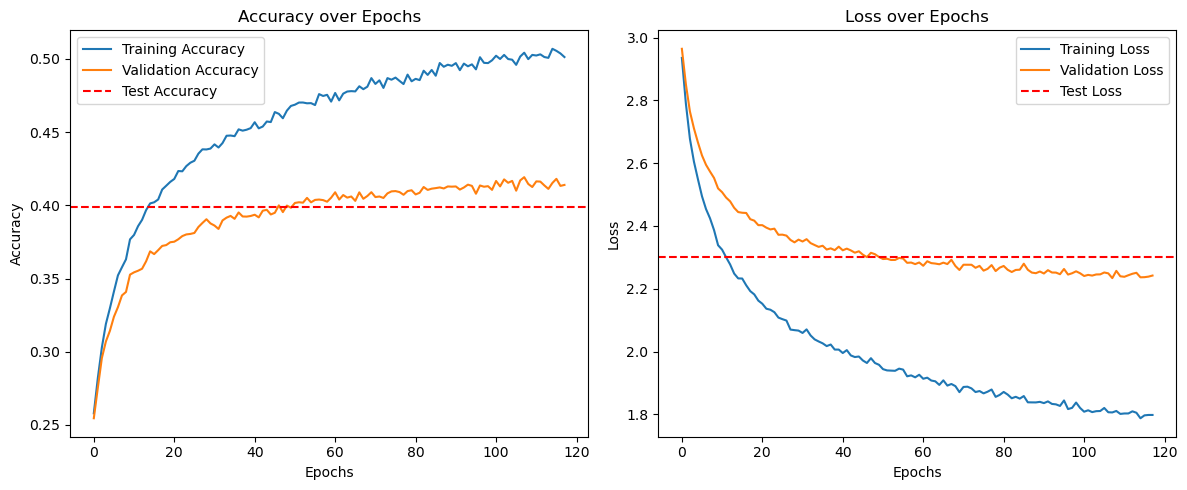

In [62]:
import matplotlib.pyplot as plt

# Assuming test_acc and test_loss are defined from your evaluation on the test set

# Plotting results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Accuracy plot
axes[0].plot(training_accuracy, label='Training Accuracy')
axes[0].plot(validation_accuracy, label='Validation Accuracy')
axes[0].axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy over Epochs')
axes[0].legend()

# Loss plot
axes[1].plot(training_loss, label='Training Loss')
axes[1].plot(validation_loss, label='Validation Loss')
axes[1].axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss over Epochs')
axes[1].legend()

fig.tight_layout()
plt.show()

In [125]:
model.eval()
nn_probs = []
with torch.no_grad():
    for x_batch, _ in test_loader:
        x_batch = x_batch.to(device)
        outputs = model(x_batch)
        nn_probs.append(torch.softmax(outputs, dim=1).cpu().numpy())
nn_probs = np.concatenate(nn_probs)

---

# Results and ROC Curve

#### Logreg

Average AUC (Macro): 0.895


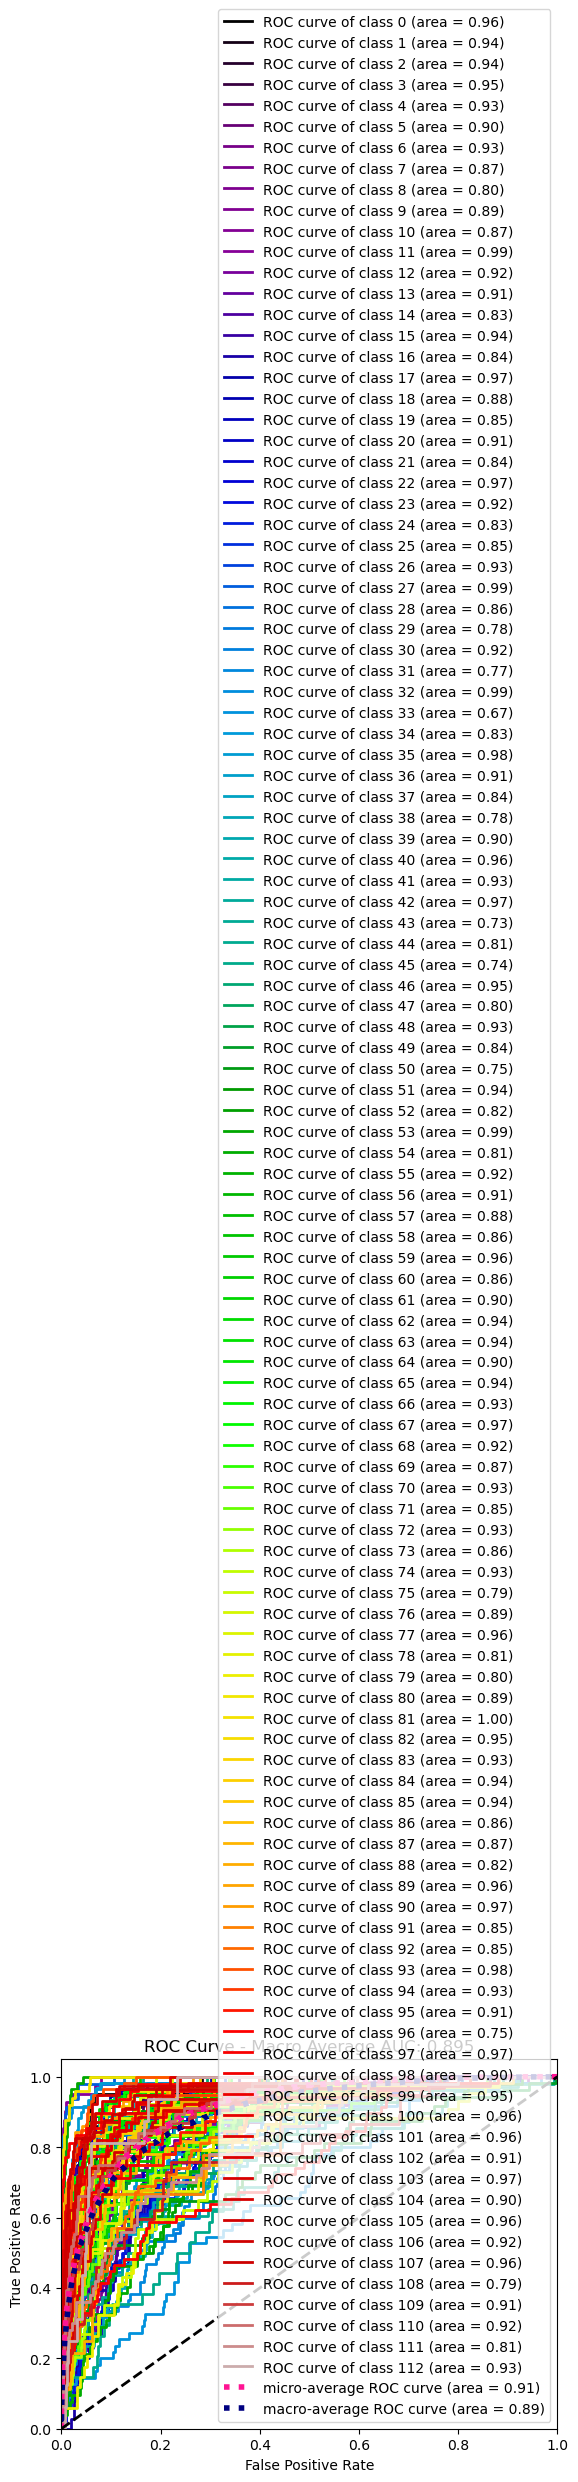

In [164]:
probs = clf_r.predict_proba(X_test)

# Compute average AUC
auc_macro = roc_auc_score(y_test, probs, multi_class='ovr', average='macro')

# Print average AUC score
print(f'Average AUC (Macro): {auc_macro:.3f}')

# Plot ROC curve for macro-average AUC
plot_roc(y_test, probs, title=f'ROC Curve - Macro Average AUC: {auc_macro:.3f}')
plt.show()

##### XGB

Average AUC (Macro): 0.969


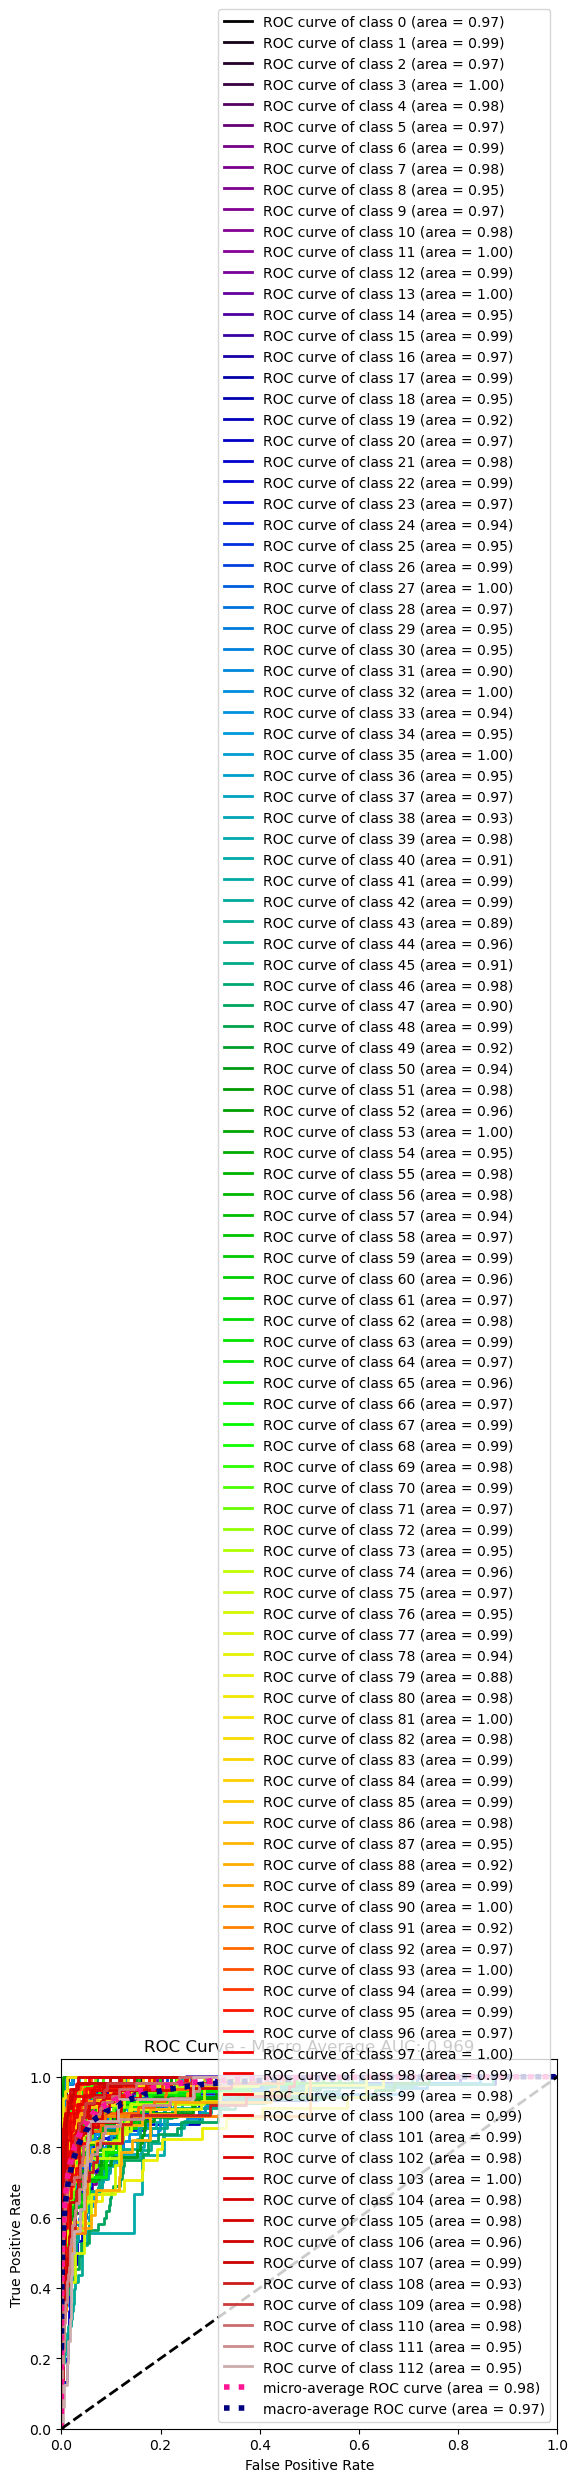

In [163]:
probs_XGB = XGB_clf.predict_proba(X_test)

# Compute average AUC
auc_macro = roc_auc_score(y_test, probs_XGB, multi_class='ovr', average='macro')

# Print average AUC score
print(f'Average AUC (Macro): {auc_macro:.3f}')

# Plot ROC curve for macro-average AUC
plot_roc(y_test, probs_XGB, title=f'ROC Curve - Macro Average AUC: {auc_macro:.3f}')
plt.show()

#### NN

Average AUC (Macro): 0.953


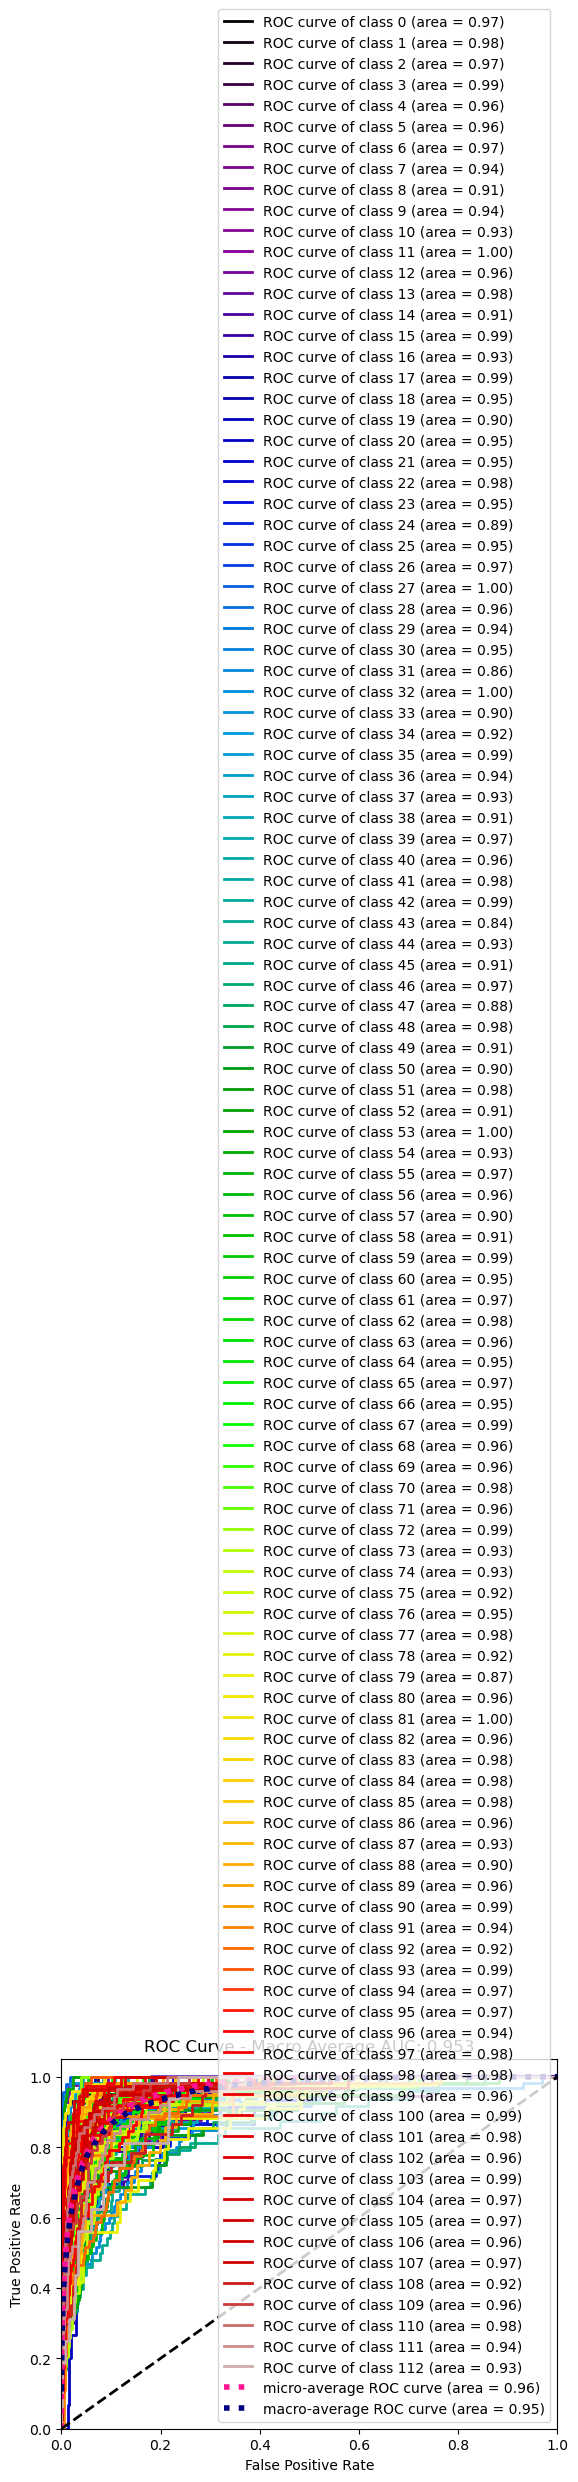

In [126]:
#probs_nn = model.predict_proba(X_test)

# Compute average AUC
auc_macro = roc_auc_score(y_test, nn_probs, multi_class='ovr', average='macro')

# Print average AUC score
print(f'Average AUC (Macro): {auc_macro:.3f}')

# Plot ROC curve for macro-average AUC
plot_roc(y_test, nn_probs, title=f'ROC Curve - Macro Average AUC: {auc_macro:.3f}')
plt.show()

In [ ]:
# Assuming y_test, logreg_probs, xgb_probs, and nn_probs are defined
# y_test should be the true labels

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize the dictionary to store FPR, TPR, and AUC
fpr = {}
tpr = {}
roc_auc = {}

# Calculate the macro-average ROC curve and AUC for Logistic Regression
fpr["logreg"], tpr["logreg"], _ = roc_curve(y_test_bin.ravel(), logreg_probs.ravel())
roc_auc["logreg"] = auc(fpr["logreg"], tpr["logreg"])

# Calculate the macro-average ROC curve and AUC for XGBoost
fpr["xgb"], tpr["xgb"], _ = roc_curve(y_test_bin.ravel(), xgb_probs.ravel())
roc_auc["xgb"] = auc(fpr["xgb"], tpr["xgb"])

# Calculate the macro-average ROC curve and AUC for Neural Network
fpr["nn"], tpr["nn"], _ = roc_curve(y_test_bin.ravel(), nn_probs.ravel())
roc_auc["nn"] = auc(fpr["nn"], tpr["nn"])

# Plot all three macro-average ROC curves
plt.figure()
plt.plot(fpr["logreg"], tpr["logreg"], color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc["logreg"])
plt.plot(fpr["xgb"], tpr["xgb"], color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc["xgb"])
plt.plot(fpr["nn"], tpr["nn"], color='green', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc["nn"])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC: Logistic Regression VS XGBoost VS Neural Network')
plt.legend(loc="lower right")
plt.show()